In [1]:
import torch
from meu_dataset import MeuDataset,avaliar_descritor,calcular_matching
from teste_util import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path_dataset = "./data/datasets/features_path_flowers_dataset.pt"
# Carregar o dataset do arquivo "meu_dataset.pt"
meu_dataset = MeuDataset.load_from_file(path_dataset)
#verificar se o objeto meu dataset está retornando o tensor correto
assert isinstance(meu_dataset,MeuDataset), 'o tipo de retorno não é MeuDataset'
assert isinstance(meu_dataset[0][0],torch.Tensor), 'o tipo de retorno não é torch.Tensor'


In [39]:
import gc
from torch.optim.lr_scheduler import ExponentialLR
gc.collect()
torch.cuda.empty_cache()
batch_size_siam = 100
from torch.utils.data import random_split, DataLoader

train_dataset, val_dataset, test_dataset = random_split(meu_dataset, [0.3,0.5,0.2])
# Crie uma instância do DataLoader usando seu conjunto de dados personalizado
dataloader_val = DataLoader(val_dataset, batch_size=batch_size_siam, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=batch_size_siam, shuffle=True)

In [53]:
from e2cnn import gspaces
from e2cnn import nn as enn    #the equivariant layer we need to build the model
from torch import nn
import torch
from siamesa_e2cnn import Feature


n_channel =8
PS =21
PATH_MODEL =  './data/models/feature_flowers_sp.pt'
model =Feature(n_channel=n_channel).to(device)
load_model(model,PATH_MODEL,device)


In [54]:
model.to(device).eval()
with torch.no_grad():
    total_acertos,total_erros,total_elementos = avaliar_descritor(dataloader_test, model,th=0.5)
sub_conjunto = total_elementos//2
print(f'Total de elementos no DataLoader: {total_elementos}')
print(f'Acertei: {total_acertos}/{sub_conjunto} Errei: {total_erros}/{sub_conjunto}')

100%|██████████| 13/13 [00:00<00:00, 148.70it/s]

Total de elementos no DataLoader: 4992
Acertei: 1529/2496 Errei: 7/2496


  0%|          | 0/13 [00:00<?, ?it/s]

torch.Size([100, 8, 32, 32])


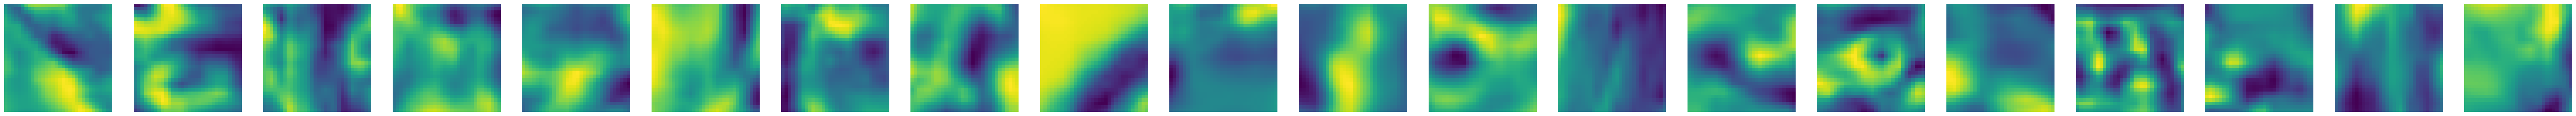

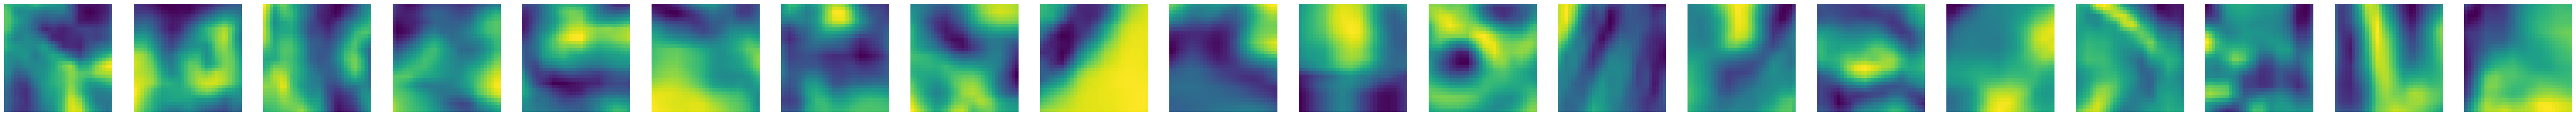

  8%|▊         | 1/13 [00:00<00:09,  1.22it/s]

torch.Size([100, 8, 32, 32])


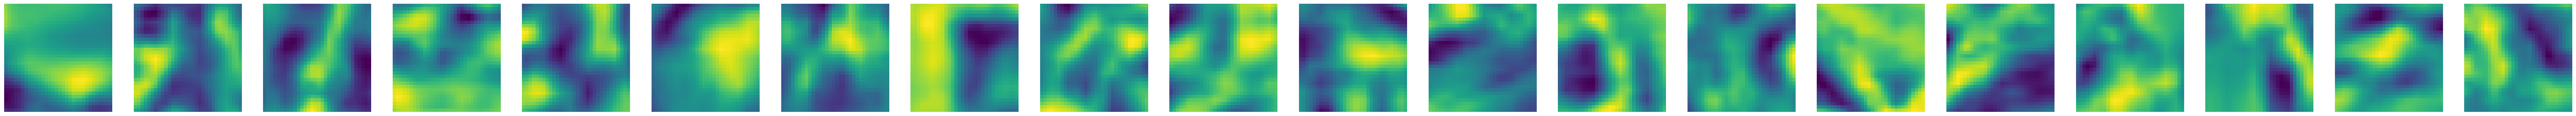

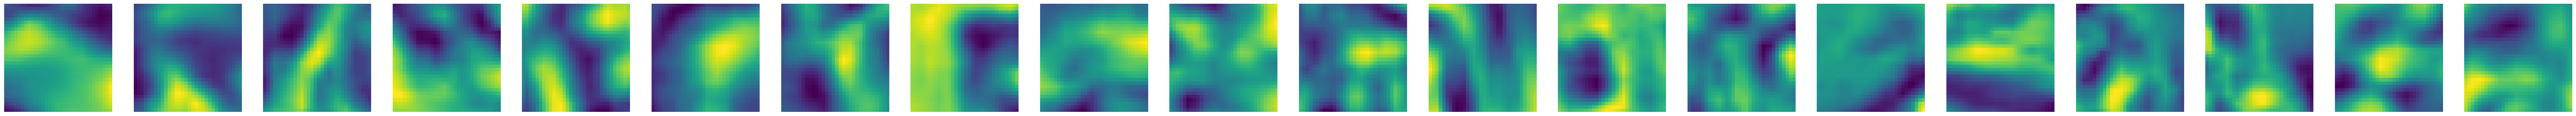

 15%|█▌        | 2/13 [00:01<00:10,  1.09it/s]

torch.Size([100, 8, 32, 32])


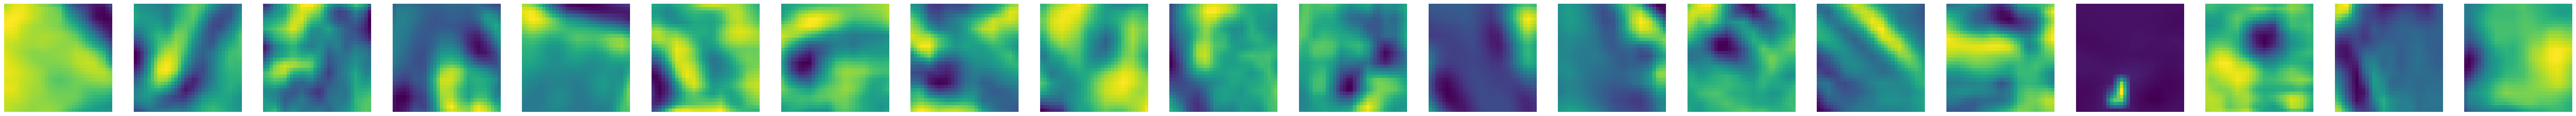

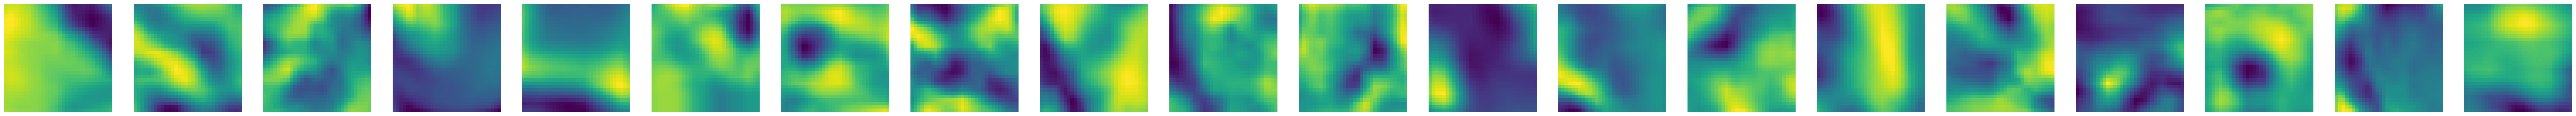

 23%|██▎       | 3/13 [00:02<00:09,  1.09it/s]

torch.Size([100, 8, 32, 32])


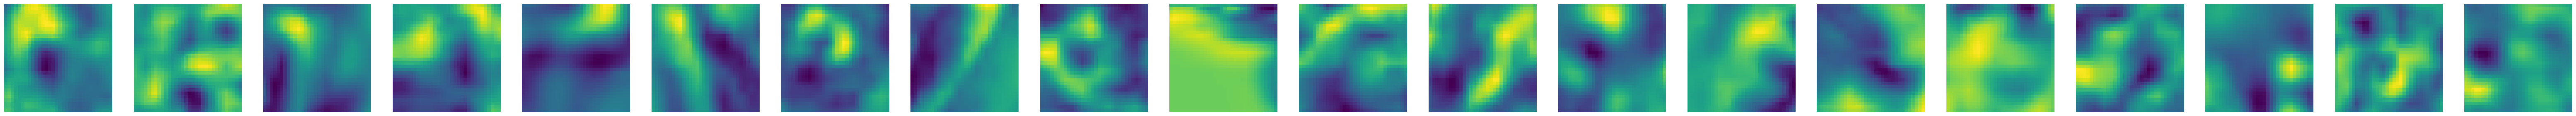

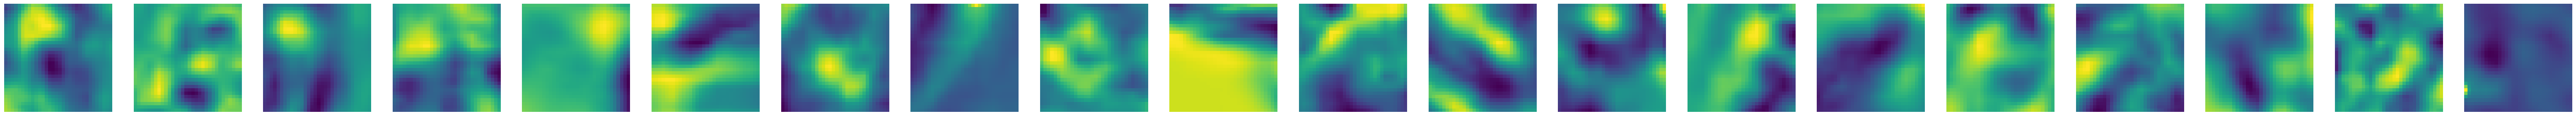

 31%|███       | 4/13 [00:03<00:07,  1.14it/s]

torch.Size([100, 8, 32, 32])


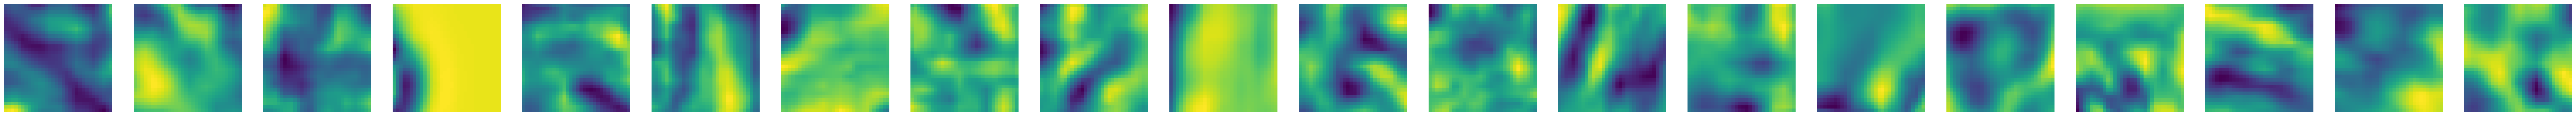

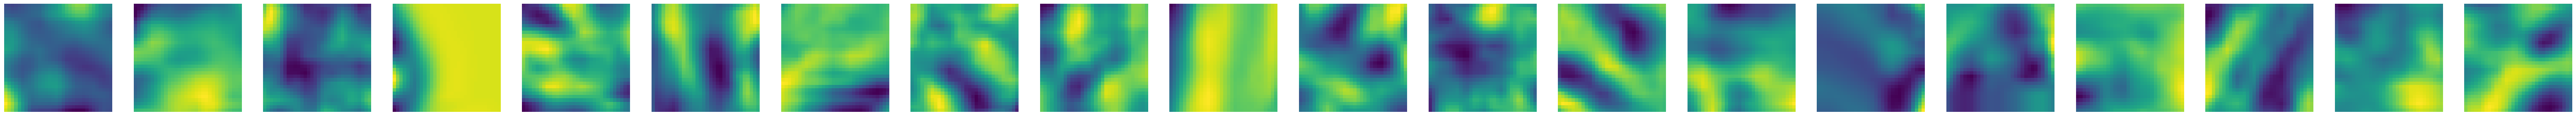

 38%|███▊      | 5/13 [00:04<00:07,  1.11it/s]

torch.Size([100, 8, 32, 32])


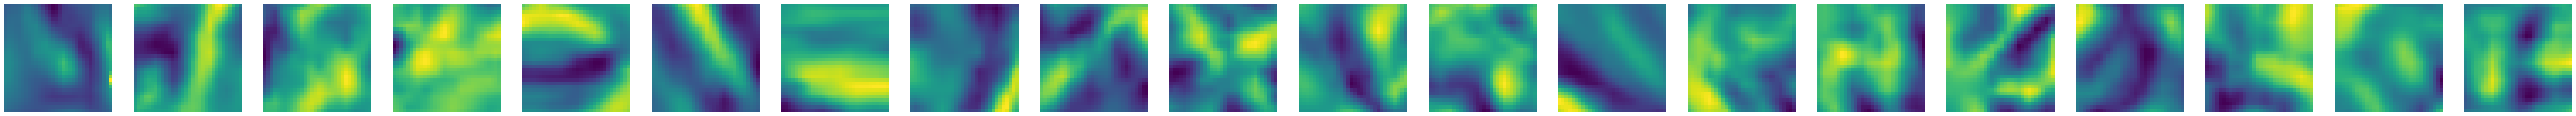

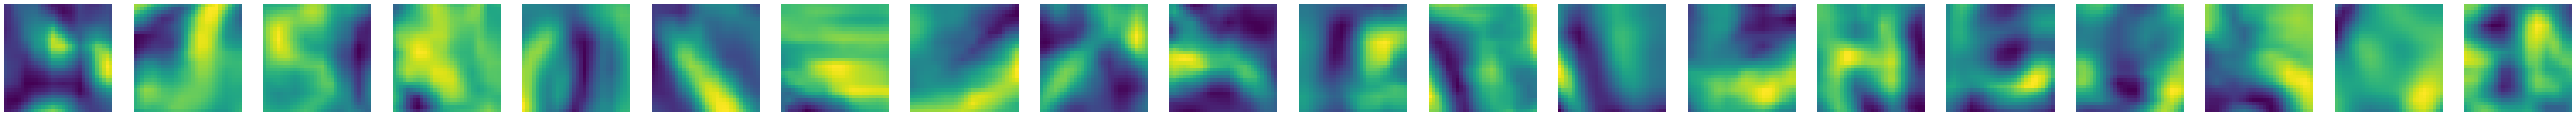

 46%|████▌     | 6/13 [00:05<00:06,  1.08it/s]

torch.Size([100, 8, 32, 32])


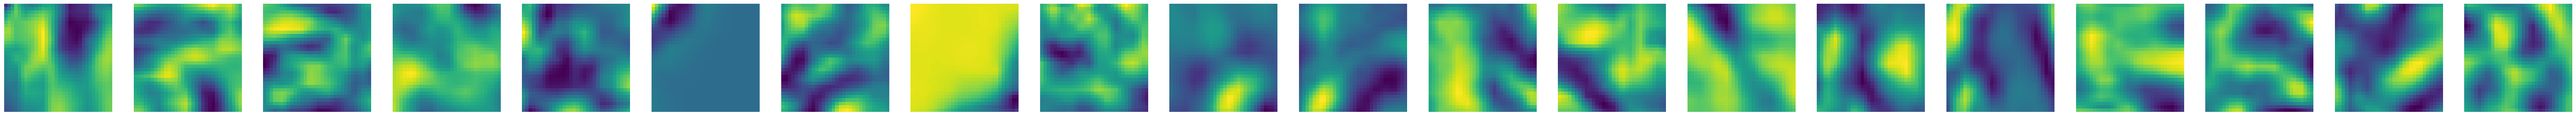

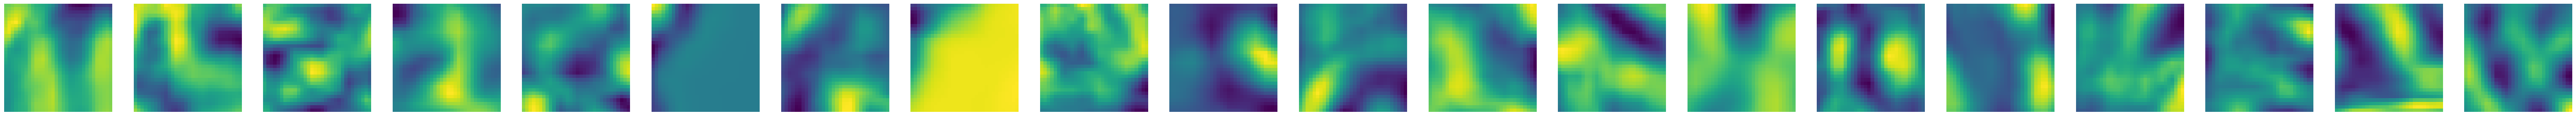

 54%|█████▍    | 7/13 [00:06<00:05,  1.12it/s]

torch.Size([100, 8, 32, 32])


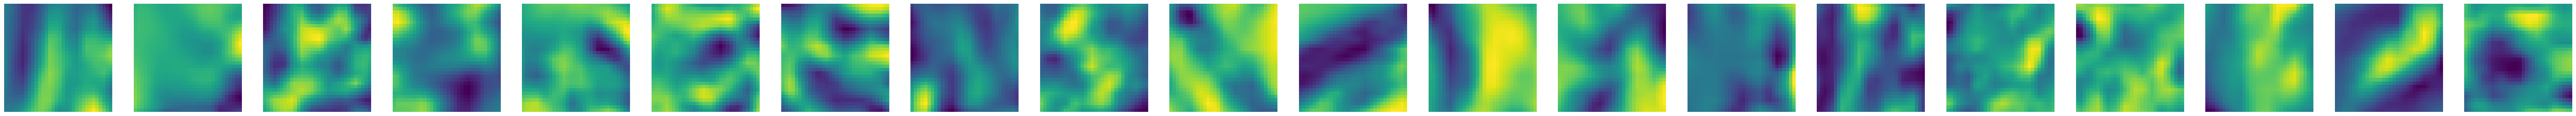

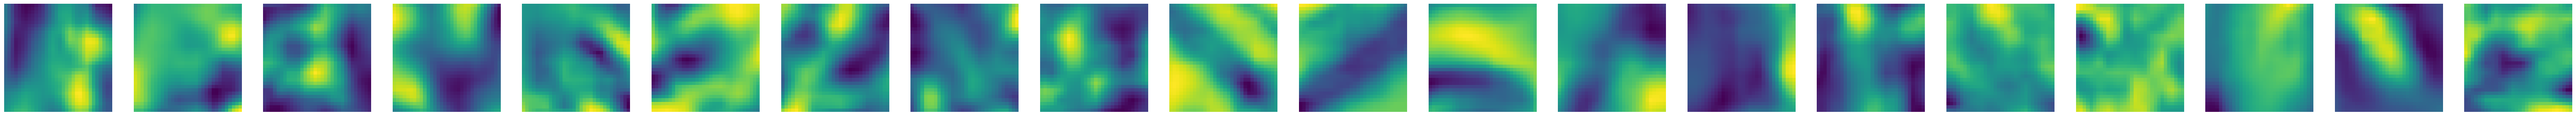

 62%|██████▏   | 8/13 [00:07<00:04,  1.10it/s]

torch.Size([100, 8, 32, 32])


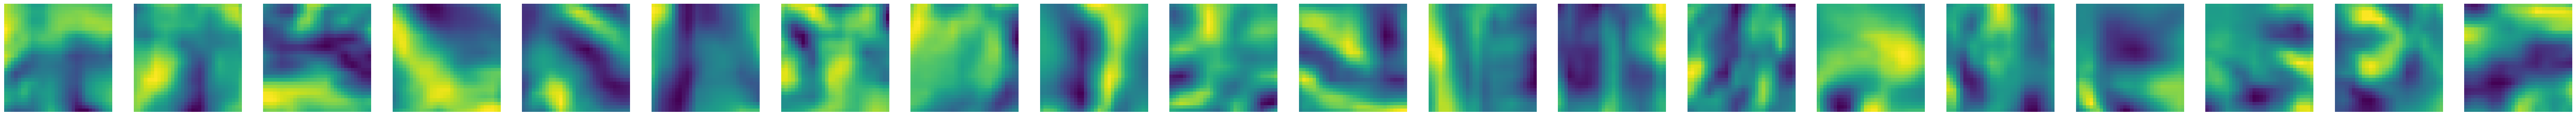

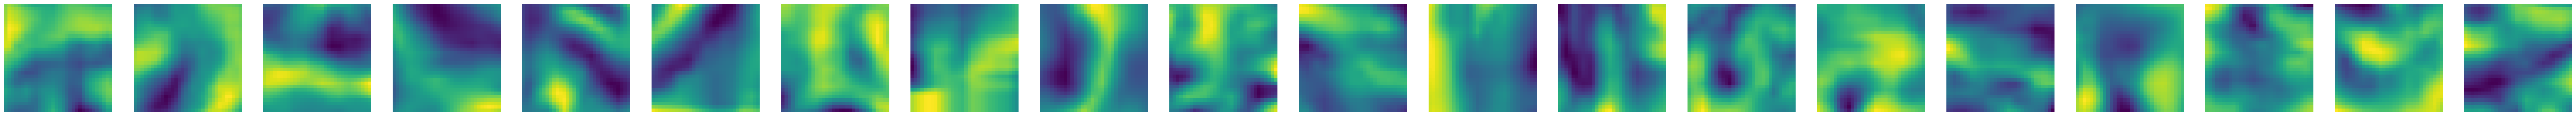

 69%|██████▉   | 9/13 [00:08<00:03,  1.08it/s]

torch.Size([100, 8, 32, 32])


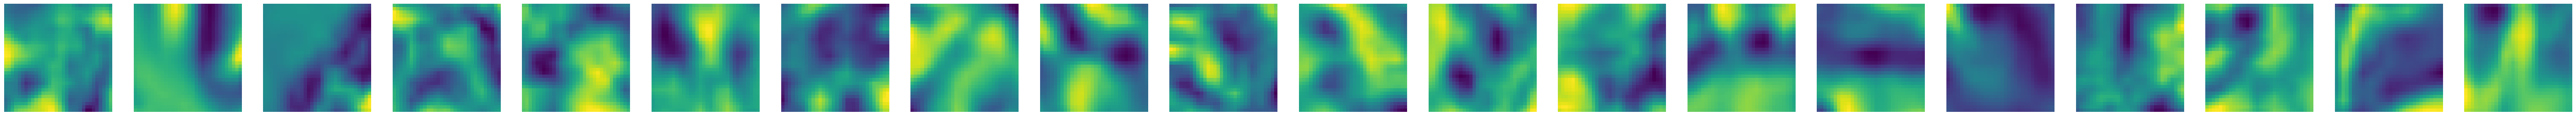

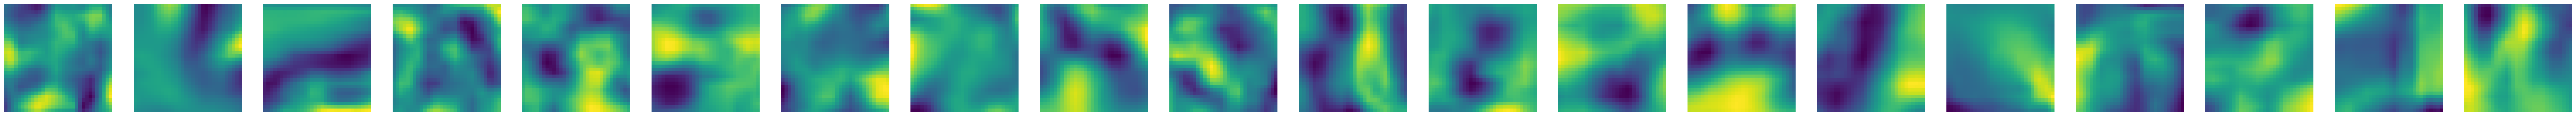

 77%|███████▋  | 10/13 [00:08<00:02,  1.13it/s]

torch.Size([100, 8, 32, 32])


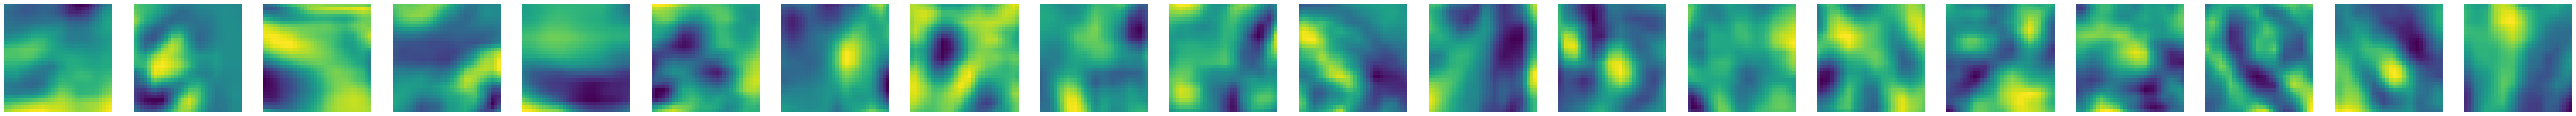

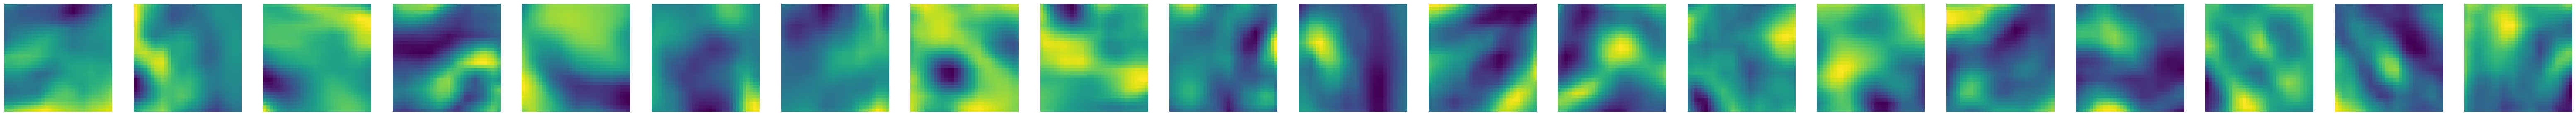

 85%|████████▍ | 11/13 [00:09<00:01,  1.12it/s]

torch.Size([100, 8, 32, 32])


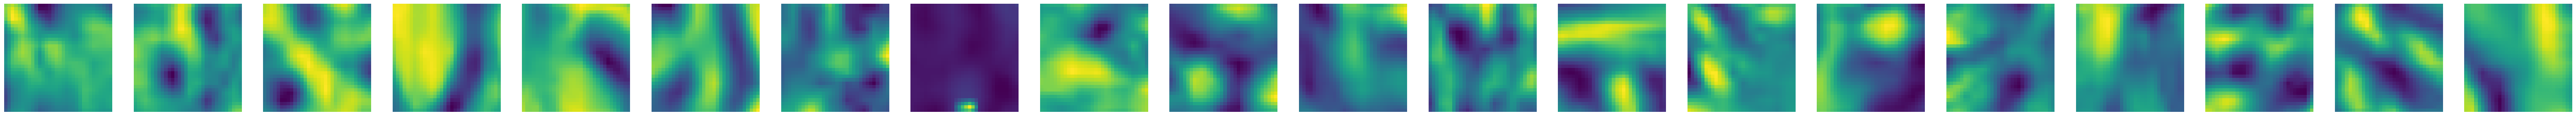

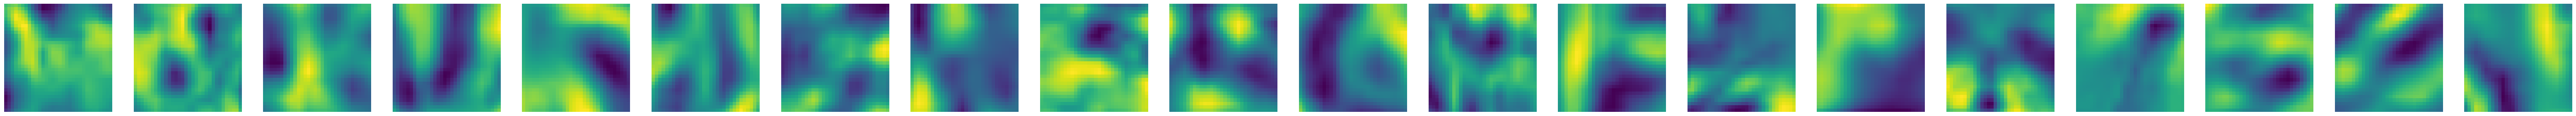

 92%|█████████▏| 12/13 [00:10<00:00,  1.11it/s]

torch.Size([48, 8, 32, 32])


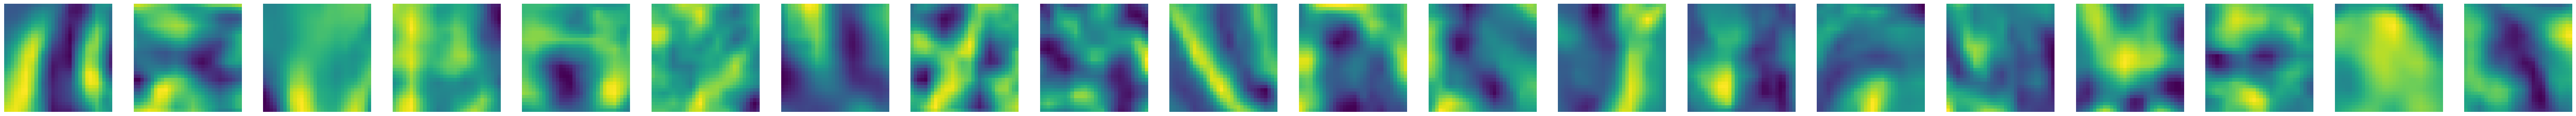

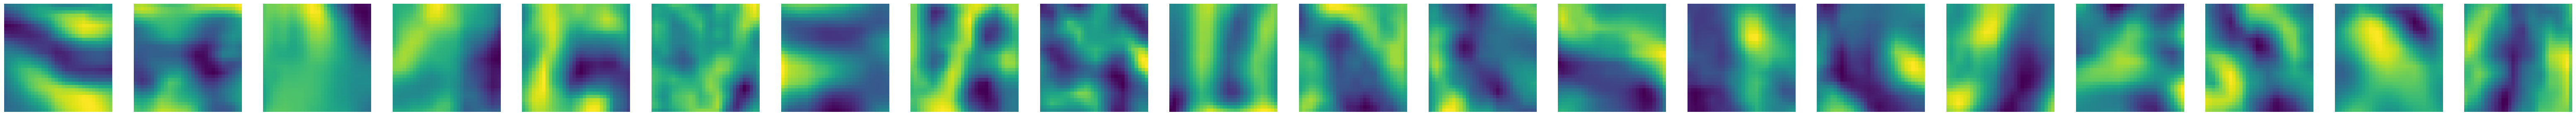

100%|██████████| 13/13 [00:11<00:00,  1.12it/s]


In [30]:
import matplotlib.pyplot as plt
from tqdm import tqdm
def plot_patches_side_by_side(imgs_patches):
    num_imgs = imgs_patches.shape[0]  # Número de imagens
    fig, axs = plt.subplots(1, num_imgs, figsize=(num_imgs*4, 4))

    axs = axs.reshape((1, num_imgs))  # Ajustar a forma para matriz 2D com uma única linha

    for i in range(num_imgs):
        axs[0, i].imshow(kornia.tensor_to_image(imgs_patches[i]))
        axs[0, i].axis('off')

    plt.show()
    
progress_bar = tqdm(dataloader_test)
for idx, data in enumerate(progress_bar):
    # extrair as features e orientações
    batch_in, batch_out = data[0].to(device), data[1].to(device)
    print(batch_in.shape)
    plot_patches_side_by_side(batch_in[:20,0])
    plot_patches_side_by_side(batch_out[:20,0])
    